##### ----------------<강사님 설명>----------------------
##### - .ffil(): 결측치 값을 바로 직전 데이터랑 맞춰준다

##### - EDA: 집계데이터 써도 상관 ㄴ
##### - 머신러닝: 집계데이터는 각각 개별 데이터로 변환해줘야됨
#####   - 재구조화(재배치) 필요: melt()

##### - group_by 안에 두개 이상의 변수가 들어갈 때:
#####     - 시각화를 염두해 둔다면 as_index=False 로 인덱스 풀어줘야 된다

##### - 구조분해
#####    - ex. k = [10, 20, 30]일 때
#####    - `(x, y, z) = k (괄호 생략 가능 x, y, z = k)`
#####    - `print(x)` 또는 `k[0]`하면 10이 출력됨
#####     ------------------------------------------------------

# [LAB-06] 12. 서브플롯 (2): 전국 지역별 실업률 변화

# 연습예제: 전국 실업률 분포 변화
- 전처리, 재배치, 시각화 연습용

`unemployment_age` 데이터는 2000년 부터 2022년 까지 행정구역(시도)/연령별 실업률을 담고 있다.

이 데이터를 토대로 지역 별 실업률의 변화 추이를 확인해보자

## #01. 준비작업

### 1. 패키지 참조

In [7]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
from pandas import pivot_table
from pandas import melt
import numpy as np

### 2. 그래프 초기화

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

### 3. 데이터 가져오기

0번째 열과 1번째 열을 복수 인덱스로 지정:

In [3]:
origin = load_data('unemployment_age')
origin.head()

[data] https://data.hossam.kr/data/lab06/unemployment_age.xlsx
[desc] 2000년부터 2022년까지 행정구역(시도)/연령별 실업률 데이터 (출처: 국가통계포털)
[!] Cannot read metadata


,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,NaN,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,NaN,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,NaN,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


## #02. 데이터 전처리

### 1. 시 이름에 대한 결측치 처리: .ffil()

In [5]:
df = origin.copy()
df['시도별'] = df['시도별'].ffill()
df.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


## #03. 시각화

### 1. 년도별 전국 평균 실업률 변화 조사

#### (1) 데이터 전처리

##### 데이터 재구조화:

In [8]:
df2 = melt(df, id_vars = ['시도별', '연령계층별'],
           var_name = '년도', value_name = '실업률')
df2.head()

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5


##### 년도별 시도에 따른 평균 실업률:

In [12]:
tdf1 = df2[['시도별', '년도', '실업률']].groupby(['시도별', '년도'], 
        as_index=False).mean()
tdf1

,시도별,년도,실업률
0,강원도,2000,2.766667
1,강원도,2001,2.333333
2,강원도,2002,2.100000
3,강원도,2003,2.566667
4,강원도,2004,2.633333
...,...,...,...
386,충청북도,2018,3.400000
387,충청북도,2019,4.200000
388,충청북도,2020,4.466667
389,충청북도,2021,3.433333


##### 년도별 전국에 대한 평균 실업률:

In [13]:
tdf2 = df2[['년도', '실업률']].groupby('년도').mean()
tdf2

,실업률
년도,
2000,4.103922
2001,3.762745
2002,3.154902
2003,3.437255
2004,3.582353
2005,3.584314
2006,3.488235
2007,3.343137
2008,3.282353


#### (2) 데이터 시각화

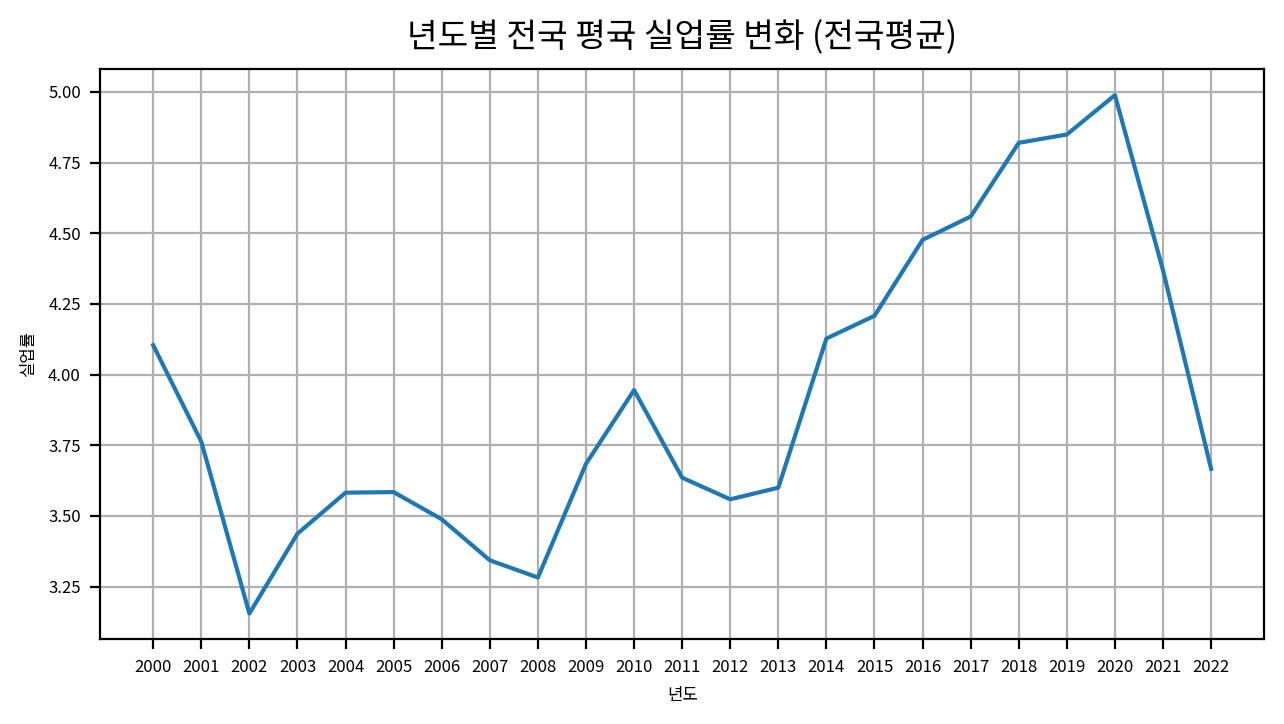

In [14]:
# 1) 그래프 초기화 
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) lineplot 그래프 그리기 
sb.lineplot(data = tdf2, x = tdf2.index, y = '실업률')

# 3) 그래프 꾸미기: 
ax.set_title("년도별 전국 평귝 실업률 변화 (전국평균)", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.savefig('plot.png', dpi = my_dpi * 2)   
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

-> 해석:
- 2000년 이후 증감을 반복하는 모습을 보이지만 전체적으로 증가하는 추세.
- 2020년 이후 급감함

### 2. 연령대별 년도에 따를 전국 평균 실업률 변화 조사

#### (1) 데이터 전처리
> 앞에서 만든 데이터 재구조화 결과에서 이어서 진행

##### 데이터 그룹별 집계:

In [16]:
gdf = df2.filter(['년도', '연령계층별', '실업률']).groupby(['년도', '연령계층별'], as_index=False).mean()
gdf

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


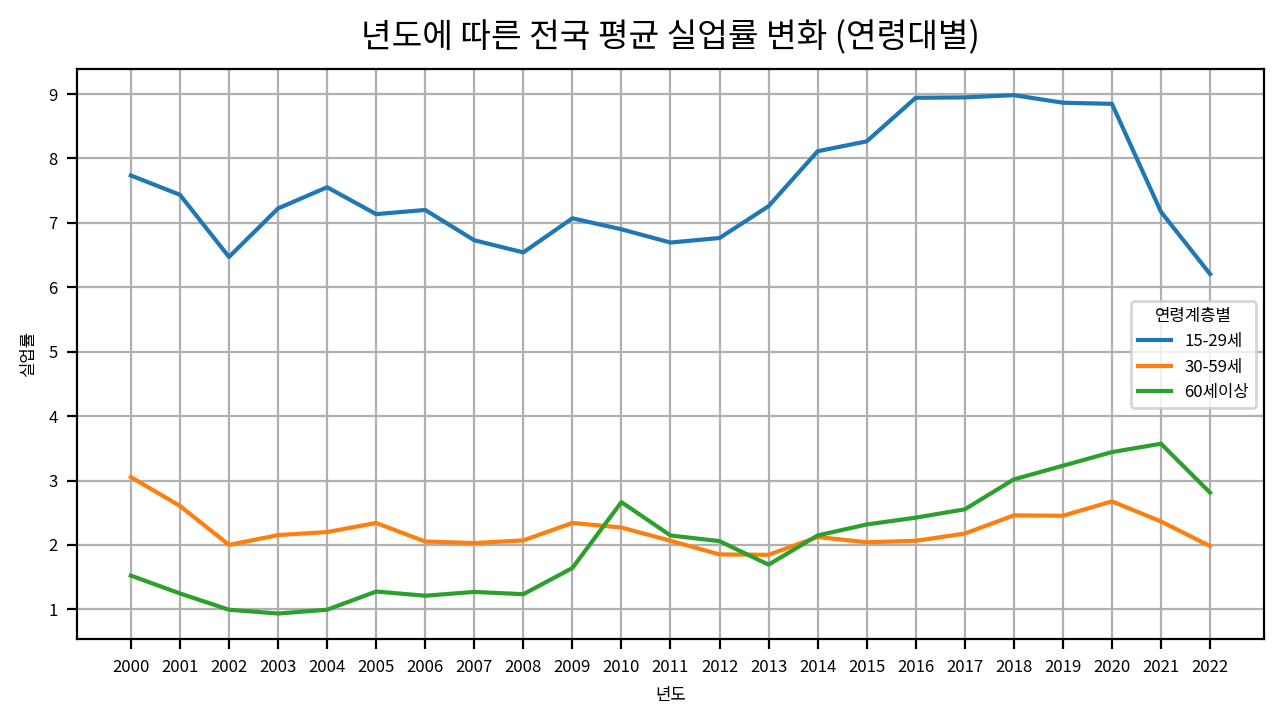

In [17]:
# 1) 그래프 초기화 
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)


# 2) lineplot 그래프 그리기
sb.lineplot(data = gdf, x = '년도', y = '실업률', hue = '연령계층별')

# 3) 그래프 꾸미기: 
ax.set_title("년도에 따른 전국 평균 실업률 변화 (연령대별)", pad = 8, fontsize = 12)
ax.grid(True)                # 배경, 격자 표시/숨김

# 4) 출력
plt.savefig('plot.png', dpi = my_dpi * 2)  
plt.tight_layout()                          # 여백 제거
plt.show()                                  # 그래프 화면 출력
plt.close()                                 # 그래프 작업 종료

## #04. 두 그래프를 서브플롯화 하기

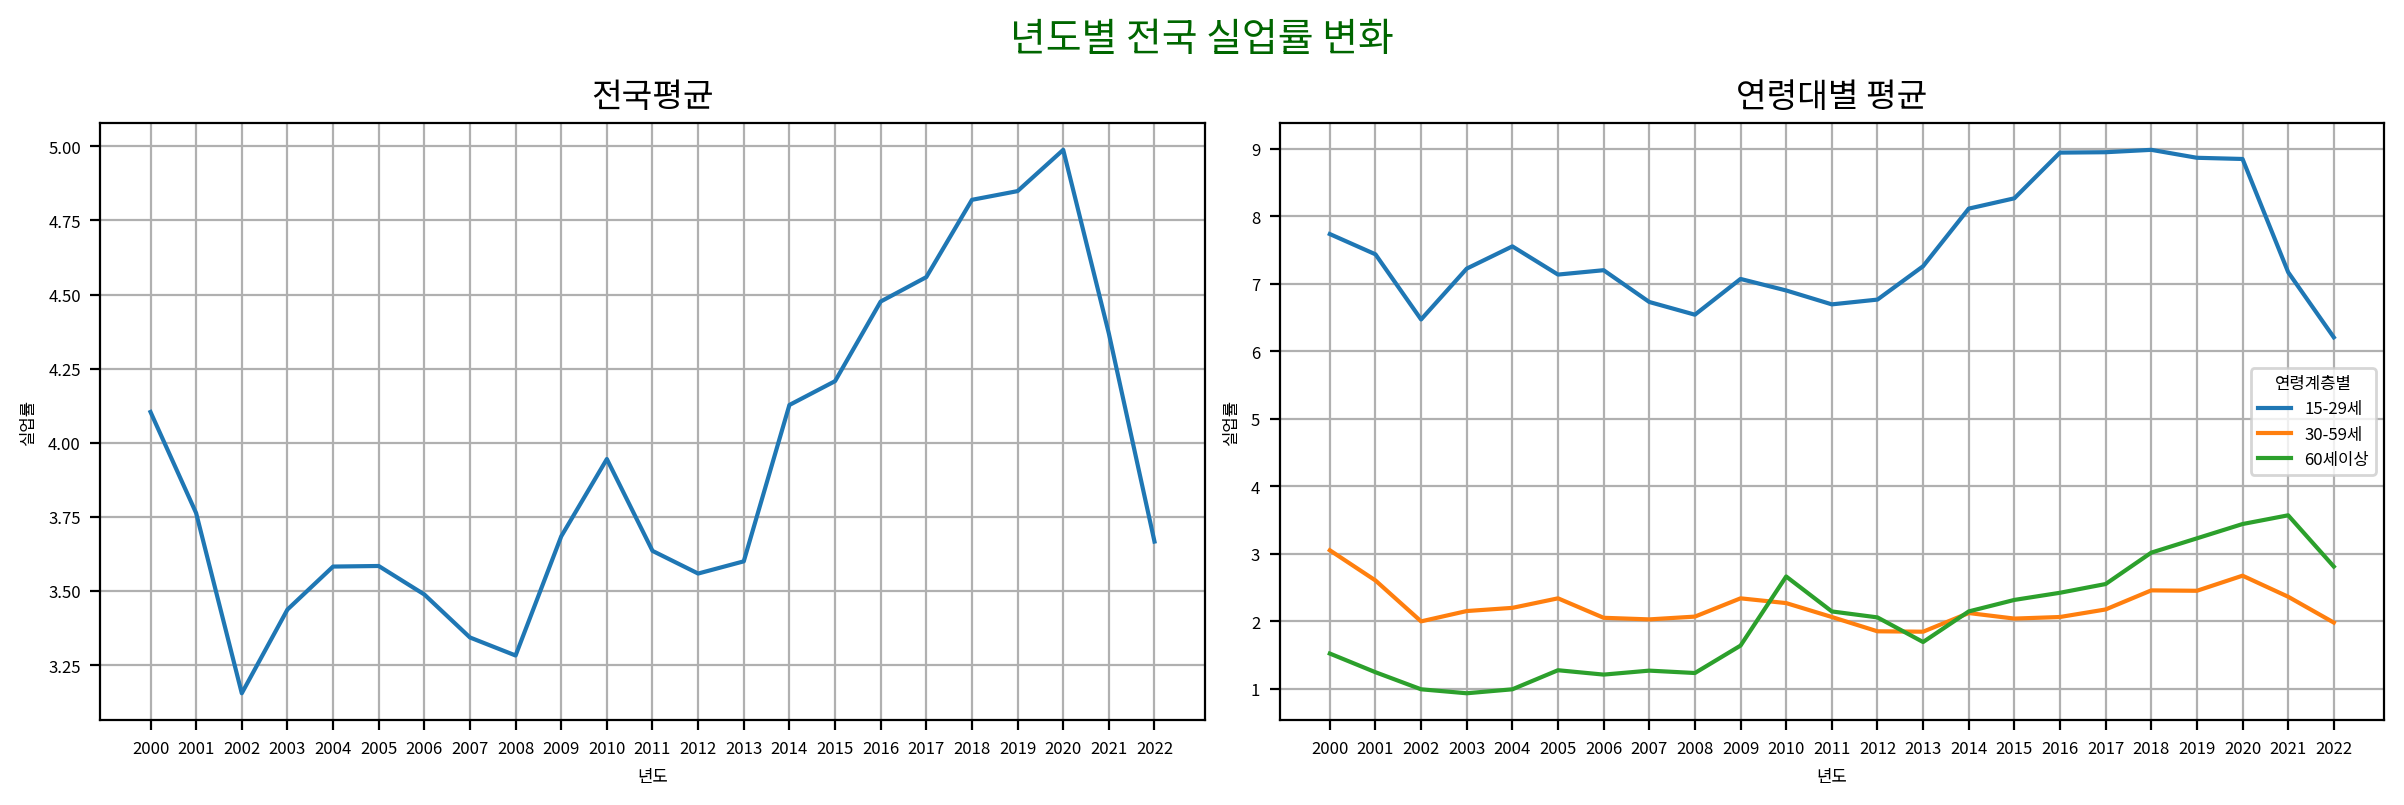

In [19]:
# 1) 그래프 초기화
width_px = 2400             # 그래프 가로 크기
height_px = 800            # 그래프 세로 크기
rows = 1                    # 행 수 ≠ 1
cols = 2                    # 열 수 ≠ 1
figsize = (width_px / my_dpi, height_px / my_dpi)

# ax 객체가 행, 열 수에 따라서 리스트가 된다
#               = [fig, [ax1, ax2]]
fig, (ax1, ax2) = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) Sub plots 그래프 그리기
sb.lineplot(data=tdf2, ax = ax1, x=tdf2.index, y='실업률')
sb.lineplot(data=gdf, ax = ax2, x='년도', y='실업률', hue = '연령계층별')

# 3) 그래프 꾸미기: 전체 제목
fig.suptitle('년도별 전국 실업률 변화', fontsize = 14, color ='#006600')

# 각 그래프 간 간격 지정: 가로(wspace), 세로(hspace)
fig.subplots_adjust(wspace = 0.2, hspace = 0.2)

# 첫째 행 스타일 지정: 그래프 집단의 제목, 글자크기, 격자
ax1.title.set_text('전국평균')
ax1.title.set_fontsize(12)
ax1.grid()

# 둘째 행 스타일 지정: 그래프 집단의 제목, 글자크기, 격자
ax2.title.set_text('연령대별 평균')
ax2.title.set_fontsize(12)
ax2.grid()

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료